In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
os.getcwd()

'C:\\Users\\aditya joshi\\Desktop\\Machine Learning Project\\chemical classfier'

In [44]:
os.chdir(r"C:\Users\aditya joshi\Desktop\Machine Learning Project\chemical classfier")

In [45]:
data_1 = pd.read_csv("musk_csv.csv")

In [46]:
x = data_1.drop("ID", axis=1)
y= x.drop("molecule_name", axis=1)
z= y.drop("conformation_name", axis=1)
data = z
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [47]:
data.dtypes

f1       int64
f2       int64
f3       int64
f4       int64
f5       int64
f6       int64
f7       int64
f8       int64
f9       int64
f10      int64
f11      int64
f12      int64
f13      int64
f14      int64
f15      int64
f16      int64
f17      int64
f18      int64
f19      int64
f20      int64
f21      int64
f22      int64
f23      int64
f24      int64
f25      int64
f26      int64
f27      int64
f28      int64
f29      int64
f30      int64
         ...  
f138     int64
f139     int64
f140     int64
f141     int64
f142     int64
f143     int64
f144     int64
f145     int64
f146     int64
f147     int64
f148     int64
f149     int64
f150     int64
f151     int64
f152     int64
f153     int64
f154     int64
f155     int64
f156     int64
f157     int64
f158     int64
f159     int64
f160     int64
f161     int64
f162     int64
f163     int64
f164     int64
f165     int64
f166     int64
class    int64
Length: 167, dtype: object

In [48]:
data.isnull().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
f28      0
f29      0
f30      0
        ..
f138     0
f139     0
f140     0
f141     0
f142     0
f143     0
f144     0
f145     0
f146     0
f147     0
f148     0
f149     0
f150     0
f151     0
f152     0
f153     0
f154     0
f155     0
f156     0
f157     0
f158     0
f159     0
f160     0
f161     0
f162     0
f163     0
f164     0
f165     0
f166     0
class    0
Length: 167, dtype: int64

In [49]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


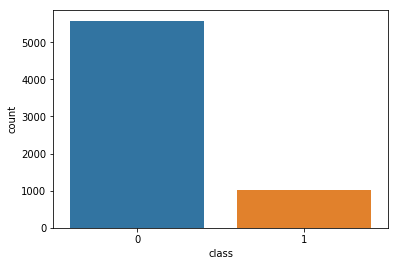

In [50]:
sns.countplot(x='class', data=data)  # arguments are passed to np.histogram
plt.show()

In [51]:
X = data.drop("class", axis=1)
Y = data['class']
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [53]:
X_train = X_train.T 
X_test = X_test.T 
X_train.shape

(166, 5278)

In [54]:
# Y_train.shape
Y_train = np.array(Y_train) 
Y_train=Y_train.reshape(-1,1)

Y_train = Y_train.T 
# Y_train.shape
Y_test = np.array(Y_test) 
Y_test=Y_test.reshape(-1,1)

Y_test = Y_test.T 
Y_test.shape

(1, 1320)

In [8]:
# 1. Initialize parameters / Define hyperparameters
# 2. Loop for num_iterations:
#     a. Forward propagation
#     b. Compute cost function
#     c. Backward propagation
#     d. Update parameters (using parameters, and grads from backprop) 
# 4. Use trained parameters to predict labels
    

In [55]:
#https://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python
#calculating logistic sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [56]:
#intializing 2 layer neural network
def initialize(n_x, n_h, n_y):

    np.random.seed(2)
    #W1 -- weight matrix of shape (n_h, n_x)
    #b1 -- bias vector of shape (n_h, 1)
    #W2 -- weight matrix of shape (n_y, n_h)
    #b2 -- bias vector of shape (n_y, 1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_y, n_h) * 0.01
    b2 = np.random.rand(n_y, 1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [57]:
#Implement the linear part of a layer's forward propagation
def forward_prop(X, parameters):
    #A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    #W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    #b -- bias vector, numpy array of shape (size of the current layer, 1)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Returns:Z -- the input of the activation function, also called pre-activation parameter 
    #cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


In [58]:
#Implement the cost function defined by equation
def compute_cost(A2, Y, parameters):
    
    #Arguments:
    #A2 -- probability vector corresponding to your label predictions, shape (1, number of examples)
    #Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    
    m = Y_train.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)#To make sure your cost's shape is what we expect
    #Returns: cost -- cross-entropy cost
    return cost


In [59]:
#implementing backward propogation
def back_prop(parameters, cache, X, Y):
    #Arguments:
    #parameters -- python dictionary containing our parameters 
    #cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    #X -- input data of shape (2, number of examples)
    #Y -- "true" labels vector of shape (1, number of examples)
    m = Y_train.shape[1]
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
     # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.square(A1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    #Returns:grads -- python dictionary containing your gradients with respect to different parameters
    return grads

In [60]:
#updating parameters
#updates parameters using the gradient descent update rule given below
def update_params(parameters, grads, alpha):
    #arguments:parameters -- python dictionary containing your parameters 
    #grads -- python dictionary containing your gradients
    #Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    # Update rule for each parameter
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


In [61]:
def predict(parameters, X,Y):
    A2, cache = forward_prop(X, parameters)
    predictions = np.round(A2)
    cost_test = compute_cost(A2, Y, parameters)
    return predictions,cost_test

In [62]:
def model(X, Y, num_iters=2600, alpha=0.1, print_cost=True):
    np.random.seed(3)
    
    parameters = initialize(n_x=X_train.shape[0],n_h= 120,n_y=Y_train.shape[0])
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    costs_train = []
    costs_test = []
    accuracy_train = []
    accuracy_test= []  
    for i in range(0, num_iters):

        A2, cache = forward_prop(X, parameters)

        cost = compute_cost(A2, Y, parameters)
#         print(cost.shape)
        grads = back_prop(parameters, cache, X, Y)
    
        parameters = update_params(parameters, grads, alpha)
        
        if print_cost  and i % 100 == 0:
            m=X.shape[1]
            p=np.zeros((1,m))
#             print ("CostTrain after iteration %i: %f" %(i, cost))
            for x in range (0,A2.shape[1]):
                if A2[0,x] >  0.5:
                    p[0,x] = 1
                else:
                    p[0,x] = 0
             
            acc_train = np.sum((p==Y)/m)
#             print ("AccuracyTrain after iteration %i: %f" %(i, acc_train ))
            
            
            predictions,cost_test = predict(parameters, X_test,Y_test)
#             print ("CostTest after iteration %i: %f" %(i, cost_test))
            acc_test=float((np.dot(Y_test, predictions.T) + np.dot(1 - Y_test, 1 - predictions.T)) / float(Y_test.size))
#             print ("AccuracyTest after iteration %i: %f" %(i, acc_test ))
            
            print('Iteration: %i Train Cost: %f || Test Cost: %f' %(i,cost,cost_test))
            print('             Train Accuracy: %f || Test Accuracy: %f' %(cost,cost_test))
            
        if print_cost and i % 100 == 0:
            costs_train.append(cost)
            costs_test.append(cost_test)
            accuracy_train.append(acc_train)
            accuracy_test.append(acc_test)
            
#     print(costs_train)
    
    plt.figure()
    plt.plot(np.squeeze(costs_train))
    plt.plot(np.squeeze(costs_test))
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.figure()
    plt.plot(accuracy_train)
    plt.plot(accuracy_test)
    plt.title('model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

        
    return parameters

In [ ]:
parameters=model(X_train, Y_train) 

Iteration: 0 Train Cost: 0.910155 || Test Cost: 0.113962
             Train Accuracy: 0.910155 || Test Accuracy: 0.113962


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test.T,predictions.T))
print(confusion_matrix(Y_test.T,predictions.T))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1111
           1       0.98      0.95      0.96       209

   micro avg       0.99      0.99      0.99      1320
   macro avg       0.99      0.97      0.98      1320
weighted avg       0.99      0.99      0.99      1320

[[1107    4]
 [  11  198]]


In [38]:
predictions,cost_test = predict(parameters,X_test,Y_test)
print ('Accuracy: %d' % float((np.dot(Y_test, predictions.T) + np.dot(1 - Y_test, 1 - predictions.T)) / float(Y_test.size) * 100) + '%')

Accuracy: 98%
